# Analyzing and Visualizing the Data

The data set "combined.csv" contains information about New York City public schools. 

In [1]:
import pandas as pd

In [2]:
combined = pd.read_csv("combined.csv")

In [3]:
combined.head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,SchoolName,AP Test Takers,Total Exams Taken,...,priority05,priority06,priority07,priority08,priority09,priority10,Location 1,lat,lon,school_dist
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355.0,404.0,363.0,1122.0,0,129.028846,197.038462,...,Then to New York City residents,0,0,0,0,0,"220 Henry Street\r\nNew York, NY 10002\r\n(40....",40.713764,-73.985260,1
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383.0,423.0,366.0,1172.0,UNIVERSITY NEIGHBORHOOD H.S.,39.000000,49.000000,...,0,0,0,0,0,0,"200 Monroe Street\r\nNew York, NY 10002\r\n(40...",40.712332,-73.984797,1
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377.0,402.0,370.0,1149.0,EAST SIDE COMMUNITY HS,19.000000,21.000000,...,0,0,0,0,0,0,"420 East 12 Street\r\nNew York, NY 10009\r\n(4...",40.729783,-73.983041,1
3,01M509,MARTA VALLE HIGH SCHOOL,44,390.0,433.0,384.0,1207.0,0,129.028846,197.038462,...,0,0,0,0,0,0,"145 Stanton Street\r\nNew York, NY 10002\r\n(4...",40.720569,-73.985673,1
4,01M539,"NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...",159,522.0,574.0,525.0,1621.0,"NEW EXPLORATIONS SCI,TECH,MATH",255.000000,377.000000,...,0,0,0,0,0,0,"111 Columbia Street\r\nNew York, NY 10002\r\n(...",40.718725,-73.979426,1


### Finding Correlations With the r Value

In [4]:
correlations = combined.corr()
correlations = correlations["sat_score"]
correlations

SAT Critical Reading Avg. Score         0.986820
SAT Math Avg. Score                     0.972643
SAT Writing Avg. Score                  0.987771
sat_score                               1.000000
AP Test Takers                          0.523140
Total Exams Taken                       0.514333
Number of Exams with scores 3 4 or 5    0.463245
Cohort                                  0.021102
Total Cohort                            0.325144
CSD                                     0.042948
NUMBER OF STUDENTS / SEATS FILLED       0.394626
NUMBER OF SECTIONS                      0.362673
AVERAGE CLASS SIZE                      0.381014
SIZE OF SMALLEST CLASS                  0.249949
SIZE OF LARGEST CLASS                   0.314434
SCHOOLWIDE PUPIL-TEACHER RATIO               NaN
schoolyear                                   NaN
fl_percent                                   NaN
frl_percent                            -0.722225
total_enrollment                        0.367857
grade9              

### Plotting Enrollment With the Plot() Accessor

In [5]:
import matplotlib.pyplot as plt

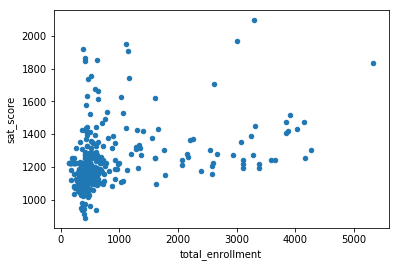

In [6]:
combined.plot.scatter(x='total_enrollment', y='sat_score')

### Exploring Schools With Low SAT Scores and Enrollment

In [7]:
combined.shape

(363, 160)

In [8]:
low_enrollment =  combined[combined["total_enrollment"] < 1000]
low_enrollment.shape

(301, 160)

In [9]:
low_enrollment =  combined[combined["sat_score"] < 1000]
low_enrollment.shape

(12, 160)

In [10]:
low_enrollment["school_name"]

91                  International Community High School
125                 Academy for Language and Technology
126                     Bronx International High School
139               Kingsbridge International High School
141               International School for Liberal Arts
176    Pan American International High School at Monroe
179                       High School of World Cultures
188                  Brooklyn International High School
225       International High School at Prospect Heights
237                          It Takes a Village Academy
253                           Multicultural High School
286              Pan American International High School
Name: school_name, dtype: object

### Plotting Language Learning Percentage

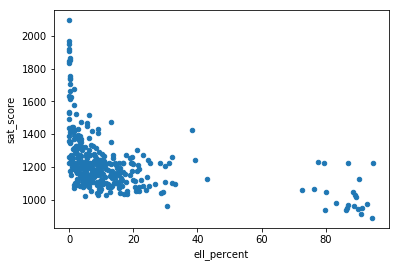

In [11]:
combined.plot.scatter(x='ell_percent', y='sat_score')

### Mapping the Schools With Basemap

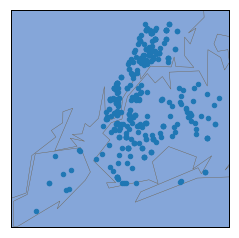

In [12]:
# create a map that centers on New York City
# conda install -c conda-forge basemap=1.0.8.dev0
# conda install -c conda-forge basemap-data-hires

from mpl_toolkits.basemap import Basemap

#import warnings
#warnings.filterwarnings('ignore')

m = Basemap(
projection='merc',
llcrnrlat=40.496044,
urcrnrlat=40.915256,
llcrnrlon=-74.255735,
urcrnrlon=-73.700272,
resolution='i'
)

m.drawmapboundary(fill_color='#85A6D9')
m.drawcoastlines(color='#6D5F47', linewidth=.4)
m.drawrivers(color='#6D5F47', linewidth=.4)

longitudes = combined["lon"].tolist()
latitudes = combined["lat"].tolist()
m.scatter(longitudes, latitudes, s=20, zorder=2, latlon=True)

### Plotting Out Statistics

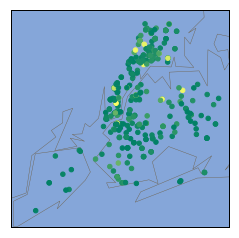

In [13]:
m = Basemap(
projection='merc',
llcrnrlat=40.496044,
urcrnrlat=40.915256,
llcrnrlon=-74.255735,
urcrnrlon=-73.700272,
resolution='i'
)

m.drawmapboundary(fill_color='#85A6D9')
m.drawcoastlines(color='#6D5F47', linewidth=.4)
m.drawrivers(color='#6D5F47', linewidth=.4)

langitudes = combined["lon"].tolist()
latitudes = combined["lat"].tolist()
m.scatter(longitudes, latitudes, s=20, zorder=2, latlon=True, c=combined["ell_percent"],cmap="summer")

### Calculating District-Level Statistics

In [14]:
import numpy

districts = combined.groupby("school_dist").agg(numpy.mean)
districts.reset_index(inplace=True)
districts.head()

,school_dist,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,AP Test Takers,Total Exams Taken,Number of Exams with scores 3 4 or 5,Cohort,Total Cohort,...,grade_span_max,expgrade_span_max,zip,total_students,number_programs,priority08,priority09,priority10,lat,lon
0,1,441.833333,473.333333,439.333333,1354.500000,116.681090,173.019231,135.800000,2006.000000,93.500000,...,12.0,12.0,10003.166667,659.500000,1.333333,0.0,0.0,0.0,40.719022,-73.982377
1,2,426.619092,444.186256,424.832836,1295.638184,128.908454,201.516827,157.495833,1713.458333,158.647849,...,12.0,12.0,10023.770833,621.395833,1.416667,0.0,0.0,0.0,40.739699,-73.991386
2,3,428.529851,437.997512,426.915672,1293.443035,156.183494,244.522436,193.087500,1504.500000,183.384409,...,12.0,12.0,10023.750000,717.916667,2.000000,0.0,0.0,0.0,40.781574,-73.977370
3,4,402.142857,416.285714,405.714286,1224.142857,129.016484,183.879121,151.035714,2006.000000,113.857143,...,12.0,12.0,10029.857143,580.857143,1.142857,0.0,0.0,0.0,40.793449,-73.943215
4,5,427.159915,438.236674,419.666098,1285.062687,85.722527,115.725275,142.464286,1432.857143,143.677419,...,12.0,12.0,10030.142857,609.857143,1.142857,0.0,0.0,0.0,40.817077,-73.949251


### Plotting Percent Of English Learners by District

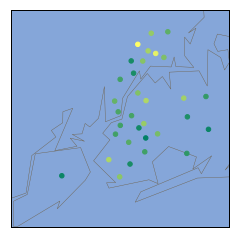

In [15]:
m = Basemap(
projection='merc',
llcrnrlat=40.496044,
urcrnrlat=40.915256,
llcrnrlon=-74.255735,
urcrnrlon=-73.700272,
resolution='i'
)

m.drawmapboundary(fill_color='#85A6D9')
m.drawcoastlines(color='#6D5F47', linewidth=.4)
m.drawrivers(color='#6D5F47', linewidth=.4)

longitudes = districts["lon"].tolist()
latitudes = districts["lat"].tolist()
m.scatter(longitudes, latitudes, s=20, zorder=2, latlon=True,c=districts["ell_percent"],cmap="summer")